In [5]:
import matplotlib.pyplot as plt
import numpy as np
import keras

from data import ICImagesDataset
from config import CFG

from torchvision.ops import Permute

In [6]:
move_channels_inward_fn = Permute([1, 2, 0])

# load train dataset to visualize training data
train_dataset = ICImagesDataset(
    annotations=CFG.annotations_fname.format("train"),
    directory=CFG.images_dirname.format("train"),
    transform=move_channels_inward_fn
)

# also load test dataset and visualize some model predictions against ground truth
test_dataset = ICImagesDataset(
    annotations=CFG.annotations_fname.format("test"),
    directory=CFG.images_dirname.format("test"),
    transform=move_channels_inward_fn
)

## 🔎 Visualize some examples from training set

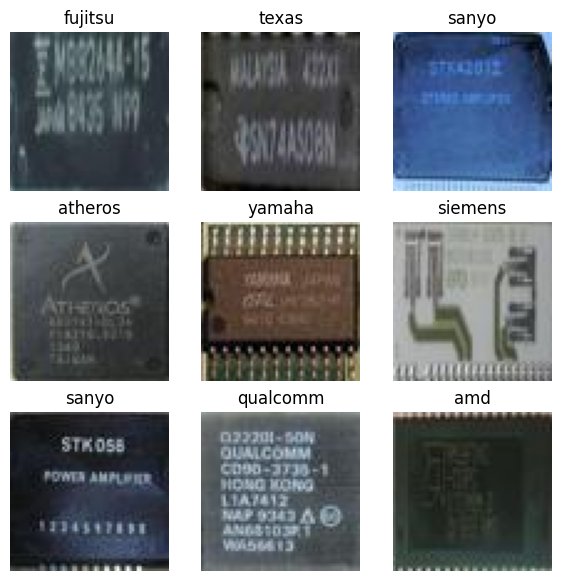

In [32]:
# pick a random sample
np.random.seed(42)
N = 9  # number of images to show
random_train_inds = np.random.randint(0, len(train_dataset), N)

plt.figure(figsize=(7, 7))
for i, ind in enumerate(random_train_inds):
    image, label = train_dataset.inspect(ind)
    gt_label = int(np.argmax(label)+1)
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(np.array(image).astype("uint8"))
    ax.set_title(label)
    plt.axis("off")

plt.savefig('train-examples.png', dpi=150)

## 🧪 Visualize some model predictions on test set

In [13]:
test_model = keras.models.load_model("models/vgg_ft_6_layers.keras")

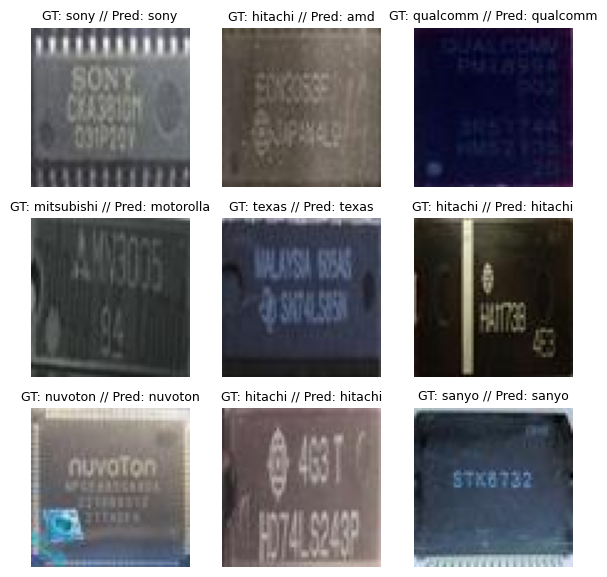

In [40]:
random_test_inds = np.random.randint(0, len(test_dataset), N)
plt.figure(figsize=(7, 7))
for i, ind in enumerate(random_test_inds):
    image, gt_label = test_dataset.inspect(ind)
    image_enc = test_dataset[ind][0]
    pred_ind = np.argmax(test_model.predict(np.expand_dims(image_enc, axis=0), verbose=0))
    prediction = test_dataset.label_map[pred_ind+1]

    # plot
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(np.array(image).astype("uint8"))
    ax.set_title(f"GT: {gt_label} // Pred: {prediction}", fontsize=9)
    plt.axis("off")